In [27]:
from statistics import median

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from parallel_challenge_launch_test import parallel_challenge_launch_test

challenge_id = 1
tries_per_amount = 10
min_concurrent_launches = 1
max_concurrent_launches = 5

df = pd.DataFrame()

for amount in range(min_concurrent_launches, max_concurrent_launches + 1):
    print(f"Amount {amount}")
    for t in range(tries_per_amount):
        print(f"  Try {t+1}/{tries_per_amount}")
        result = parallel_challenge_launch_test(challenge_id, amount, duration_seconds=0)

        launch_thread_count = result['launch_thread_count']
        launch_success_count = result['launch_success_count']
        launch_failure_count = result['launch_failure_count']
        launch_duration = result['launch_duration_seconds']

        launch_failure_rate = launch_failure_count / launch_thread_count if launch_thread_count > 0 else 0
        mean_launch_duration = launch_duration / launch_thread_count if launch_thread_count > 0 else 0

        stop_thread_count = result['stop_thread_count']
        stop_success_count = result['stop_success_count']
        stop_failure_count = result['stop_failure_count']
        stop_duration = result['stop_duration_seconds']

        stop_failure_rate = stop_failure_count / stop_thread_count if stop_thread_count > 0 else 0
        mean_stop_duration = stop_duration / stop_thread_count if stop_thread_count > 0 else 0

        df = pd.concat([df, pd.DataFrame({
            'amount': [amount],
            'launch_thread_count': [launch_thread_count],
            'launch_success_count': [launch_success_count],
            'launch_failure_count': [launch_failure_count],
            'launch_duration_seconds': [launch_duration],
            'launch_failure_rate': [launch_failure_rate],
            'mean_launch_duration_seconds': [mean_launch_duration],
            'stop_thread_count': [stop_thread_count],
            'stop_success_count': [stop_success_count],
            'stop_failure_count': [stop_failure_count],
            'stop_duration_seconds': [stop_duration],
            'stop_failure_rate': [stop_failure_rate],
            'mean_stop_duration_seconds': [mean_stop_duration],
        })], ignore_index=True)

Amount 1
  Try 1/10
  Try 2/10
  Try 3/10
  Try 4/10
  Try 5/10
  Try 6/10
  Try 7/10
  Try 8/10
  Try 9/10
  Try 10/10
Amount 2
  Try 1/10
  Try 2/10
  Try 3/10
  Try 4/10
  Try 5/10
  Try 6/10
  Try 7/10
  Try 8/10
  Try 9/10
  Try 10/10
Amount 3
  Try 1/10
  Try 2/10
  Try 3/10
  Try 4/10
  Try 5/10
  Try 6/10
  Try 7/10
  Try 8/10
  Try 9/10
  Try 10/10
Amount 4
  Try 1/10
  Try 2/10
  Try 3/10
  Try 4/10
  Try 5/10
  Try 6/10
  Try 7/10
  Try 8/10
  Try 9/10
  Try 10/10
Amount 5
  Try 1/10
  Try 2/10
  Try 3/10
  Try 4/10
  Try 5/10
  Try 6/10
  Try 7/10
  Try 8/10
  Try 9/10
  Try 10/10


In [28]:
launch_failure_rates = {}
stop_failure_rates = {}

for amount in range(min_concurrent_launches, max_concurrent_launches + 1):
    total_launch_tries = df[df['amount'] == amount]['launch_thread_count'].sum()
    total_launch_failures = df[df['amount'] == amount]['launch_failure_count'].sum()
    launch_failure_rates[amount] = total_launch_failures / total_launch_tries if total_launch_tries > 0 else 0

    total_stop_tries = df[df['amount'] == amount]['stop_thread_count'].sum()
    total_stop_failures = df[df['amount'] == amount]['stop_failure_count'].sum()
    stop_failure_rates[amount] = total_stop_failures / total_stop_tries if total_stop_tries > 0 else 0

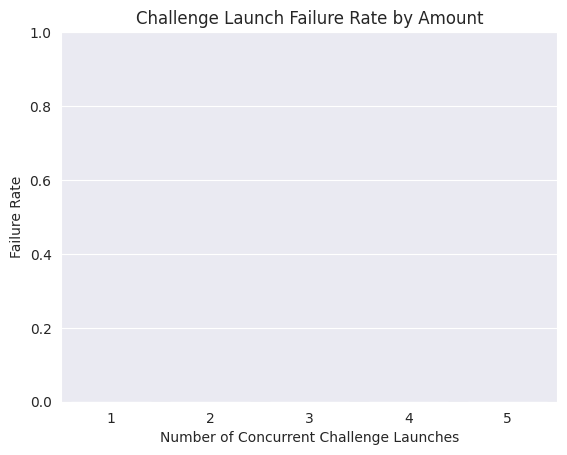

In [29]:
sns.barplot(x=list(launch_failure_rates.keys()), y=list(launch_failure_rates.values()))
plt.title("Challenge Launch Failure Rate by Amount")
plt.xlabel("Number of Concurrent Challenge Launches")
plt.ylabel("Failure Rate")
plt.ylim(0, 1)
plt.show()

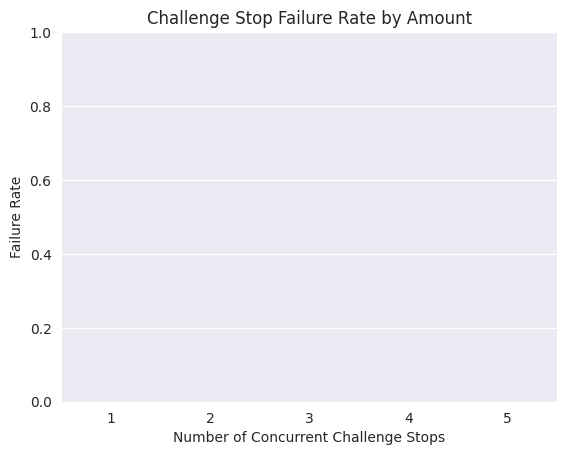

In [30]:
sns.barplot(x=list(stop_failure_rates.keys()), y=list(stop_failure_rates.values()))
plt.title("Challenge Stop Failure Rate by Amount")
plt.xlabel("Number of Concurrent Challenge Stops")
plt.ylabel("Failure Rate")
plt.ylim(0, 1)
plt.show()

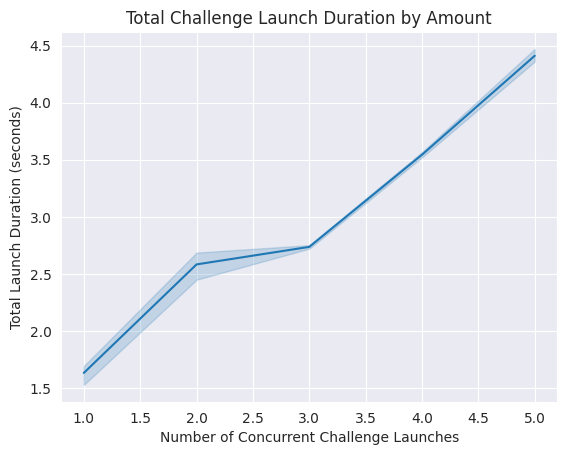

In [31]:
sns.lineplot(data=df, x='amount', y='launch_duration_seconds')
plt.title("Total Challenge Launch Duration by Amount")
plt.xlabel("Number of Concurrent Challenge Launches")
plt.ylabel("Total Launch Duration (seconds)")
plt.show()

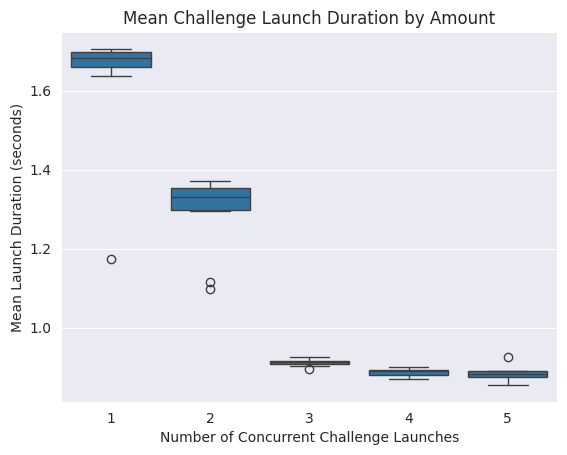

In [32]:
sns.boxplot(data=df, x='amount', y='mean_launch_duration_seconds')
plt.title("Mean Challenge Launch Duration by Amount")
plt.xlabel("Number of Concurrent Challenge Launches")
plt.ylabel("Mean Launch Duration (seconds)")
plt.show()

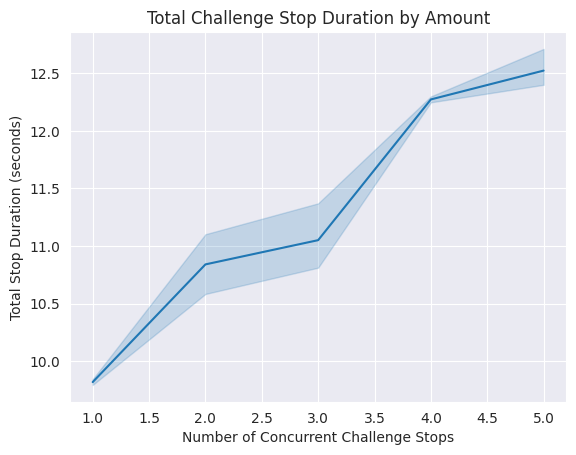

In [33]:
sns.lineplot(data=df, x='amount', y='stop_duration_seconds')
plt.title("Total Challenge Stop Duration by Amount")
plt.xlabel("Number of Concurrent Challenge Stops")
plt.ylabel("Total Stop Duration (seconds)")
plt.show()

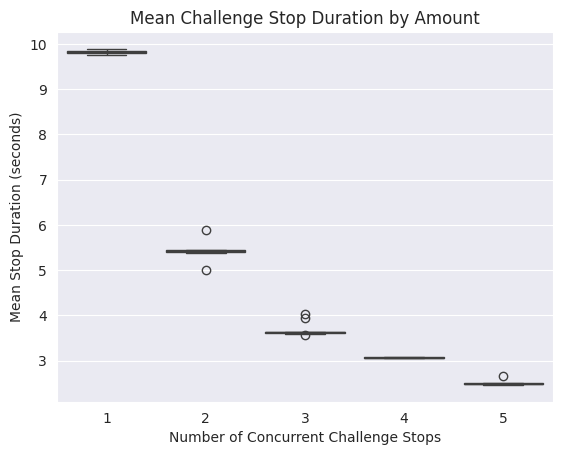

In [34]:
sns.boxplot(data=df, x='amount', y='mean_stop_duration_seconds')
plt.title("Mean Challenge Stop Duration by Amount")
plt.xlabel("Number of Concurrent Challenge Stops")
plt.ylabel("Mean Stop Duration (seconds)")
plt.show()